In [6]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, TerminateOnNaN
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r"H:\Sem-7\CS5691\Assignment-3\Datasets\Dataset2\dataset3_train.csv")
test = pd.read_csv(r"H:\Sem-7\CS5691\Assignment-3\Datasets\Dataset2\dataset3_test.csv")

x_train = train[['x1', 'x2', 'x3']].to_numpy(dtype=np.float32)
y_train = train[['y1', 'y2', 'y3']].to_numpy(dtype=np.float32)
x_test = test[['x1', 'x2', 'x3']].to_numpy(dtype=np.float32)
y_test = test[['y1', 'y2', 'y3']].to_numpy(dtype=np.float32)

In [3]:
def mse0(y_true, y_pred): return tf.reduce_mean(tf.square(y_true[:, 0] - y_pred[:, 0]))
def mse1(y_true, y_pred): return tf.reduce_mean(tf.square(y_true[:, 1] - y_pred[:, 1]))
def mse2(y_true, y_pred): return tf.reduce_mean(tf.square(y_true[:, 2] - y_pred[:, 2]))

sgd = SGD(learning_rate=0.07, momentum=0.9, clipnorm=1.0)

model = Sequential([
    Dense(15, activation="tanh", input_shape=(x_train.shape[1],)),
    Dense(10, activation="tanh"),
    Dense(3, activation="linear")
])
model.compile(optimizer=sgd, loss="mse", metrics=[mse0, mse1, mse2])

hist = model.fit(
    x_train, y_train,
    batch_size=8,
    epochs=200,
    shuffle=True,
    verbose=True
).history


c:\Users\hrush\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4950 - mse0: 0.6762 - mse1: 0.3472 - mse2: 0.4575
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2526 - mse0: 0.2344 - mse1: 0.2338 - mse2: 0.2886
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2462 - mse0: 0.2486 - mse1: 0.2751 - mse2: 0.2134
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2528 - mse0: 0.2868 - mse1: 0.2722 - mse2: 0.1991
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2272 - mse0: 0.2316 - mse1: 0.2416 - mse2: 0.2072
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2073 - mse0: 0.2222 - mse1: 0.2047 - mse2: 0.1957
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2276 - mse0: 0.2172 - mse1: 0.2840 - mse2: 0.1817
Epoch 8/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2130 - mse0: 0.2264 - mse1: 0.2221 - mse2: 0.1909
Epoch 9/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2083 - mse0: 0.2332 - mse1: 0.2069 - mse2: 0.1850
E

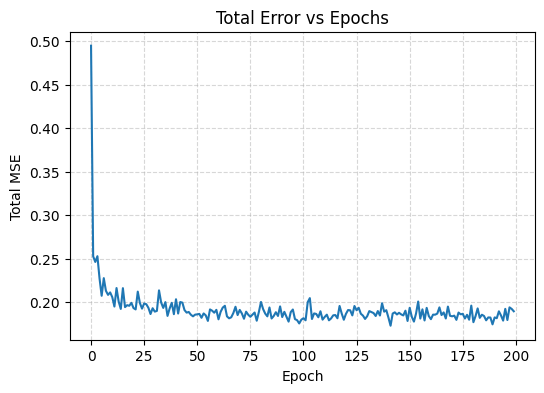

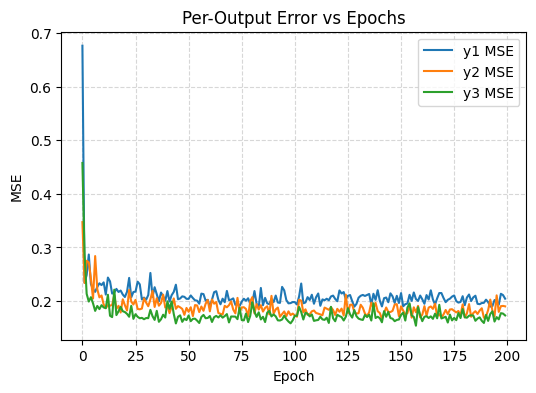

In [7]:

plt.figure(figsize=(6,4))
plt.plot(hist["loss"])
plt.xlabel("Epoch")
plt.ylabel("Total MSE")
plt.title("Total Error vs Epochs")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(hist["mse0"], label="y1 MSE")
plt.plot(hist["mse1"], label="y2 MSE")
plt.plot(hist["mse2"], label="y3 MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Per-Output Error vs Epochs")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


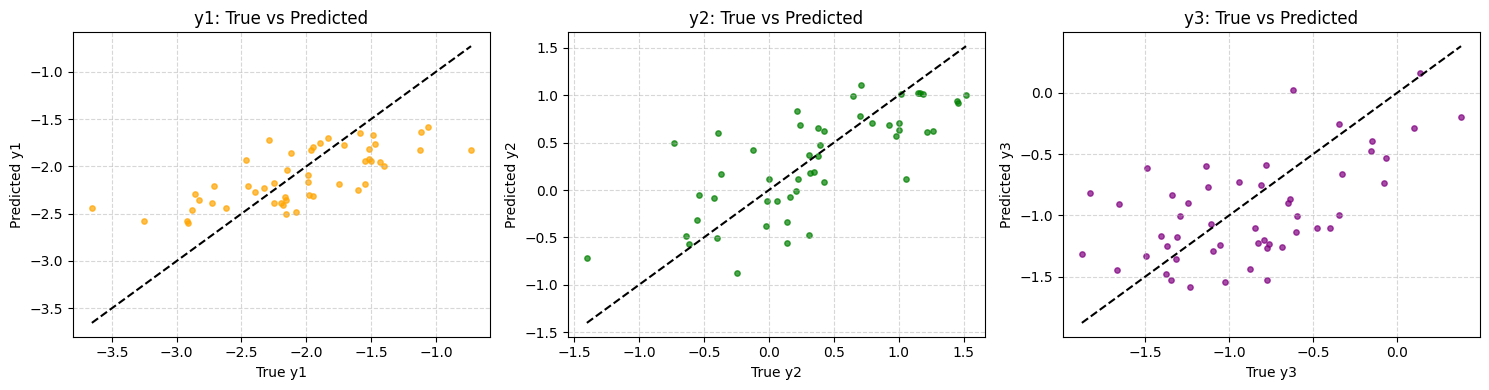

In [9]:
y_pred_test = model.predict(x_test, verbose=0)
mse_total = tf.reduce_mean(tf.square(y_test - y_pred_test), axis=1)

mse_y1 = tf.reduce_mean(tf.square(y_test[:, 0] - y_pred_test[:, 0]))
mse_y2 = tf.reduce_mean(tf.square(y_test[:, 1] - y_pred_test[:, 1]))
mse_y3 = tf.reduce_mean(tf.square(y_test[:, 2] - y_pred_test[:, 2]))

total_mse = tf.reduce_mean(mse_total).numpy()
y_errors = [mse_y1.numpy(), mse_y2.numpy(), mse_y3.numpy()]

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(y_test[:,0], y_pred_test[:,0], s=15, color='orange', alpha=0.7)
plt.plot([y_test[:,0].min(), y_test[:,0].max()],
         [y_test[:,0].min(), y_test[:,0].max()], 'k--')
plt.xlabel("True y1")
plt.ylabel("Predicted y1")
plt.title("y1: True vs Predicted")
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1,3,2)
plt.scatter(y_test[:,1], y_pred_test[:,1], s=15, color='green', alpha=0.7)
plt.plot([y_test[:,1].min(), y_test[:,1].max()],
         [y_test[:,1].min(), y_test[:,1].max()], 'k--')
plt.xlabel("True y2")
plt.ylabel("Predicted y2")
plt.title("y2: True vs Predicted")
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1,3,3)
plt.scatter(y_test[:,2], y_pred_test[:,2], s=15, color='purple', alpha=0.7)
plt.plot([y_test[:,2].min(), y_test[:,2].max()],
         [y_test[:,2].min(), y_test[:,2].max()], 'k--')
plt.xlabel("True y3")
plt.ylabel("Predicted y3")
plt.title("y3: True vs Predicted")
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
